In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Колебание шарика на пружинке (без затухания)

In [41]:
class Lab21(object):
    def __init__(self, start_time, end_time, number_of_iteration, start_x, start_x1, start_x2, k, m):
        self._time = start_time
        self._step = (end_time-start_time)/number_of_iteration
        self._number_of_iteration = number_of_iteration
        self._m = m
        self._k = k
        self._answer = {"X": [], 
                "X1": [],
                "X2": [],
                "t": []}
        self._x = start_x
        self._x1 = start_x1
        self._x2 = start_x2
        self._write_to_table()
    
    def _calculate_x2(self, x):
        return -self._k*(x/m)
    
    def _calculate_x1(self, x1, x2):
        return x1 + self._step * x2
    
    def _calculate_x(self, x, x1):
        return x + self._step * x1
    
    def _calculate_time(self, time):
        return time + self._step
    
    def _write_to_table(self):
        self._answer["X"].append(self._x)
        self._answer["X1"].append(self._x1)
        self._answer["X2"].append(self._x2)
        self._answer["t"].append(self._time)
    
    def calculate_values(self, x, x1, x2, time):
        self._x2 = self._calculate_x2(x)
        self._x1 = self._calculate_x1(x1, self._x2)
        self._x = self._calculate_x(x, self._x1)
        self._time = self._calculate_time(time)
        
    def plot_results(self, t, x, x1, x2):
        plt.figure(dpi=300)
        plt.plot(t, x, label="X")
        plt.plot(t, x1, label="X1")
        plt.plot(t, x2, label="X2")
        plt.grid(True)
        plt.legend(loc="best", fontsize=13)
        leg = plt.legend(bbox_to_anchor=(0.855,1.015),\
                         bbox_transform=plt.gcf().transFigure, ncol=3)
        plt.show()
    
    def main(self):
        for i in range(self._number_of_iteration):
            self.calculate_values(self._x, self._x1, self._x2, self._time)
            self._write_to_table()
        answer_table = pd.DataFrame(self._answer, columns=['t', 'X', 'X1', 'X2'])
        self.plot_results(self._answer["t"], self._answer["X"], self._answer["X1"], self._answer["X2"])
        print(answer_table)

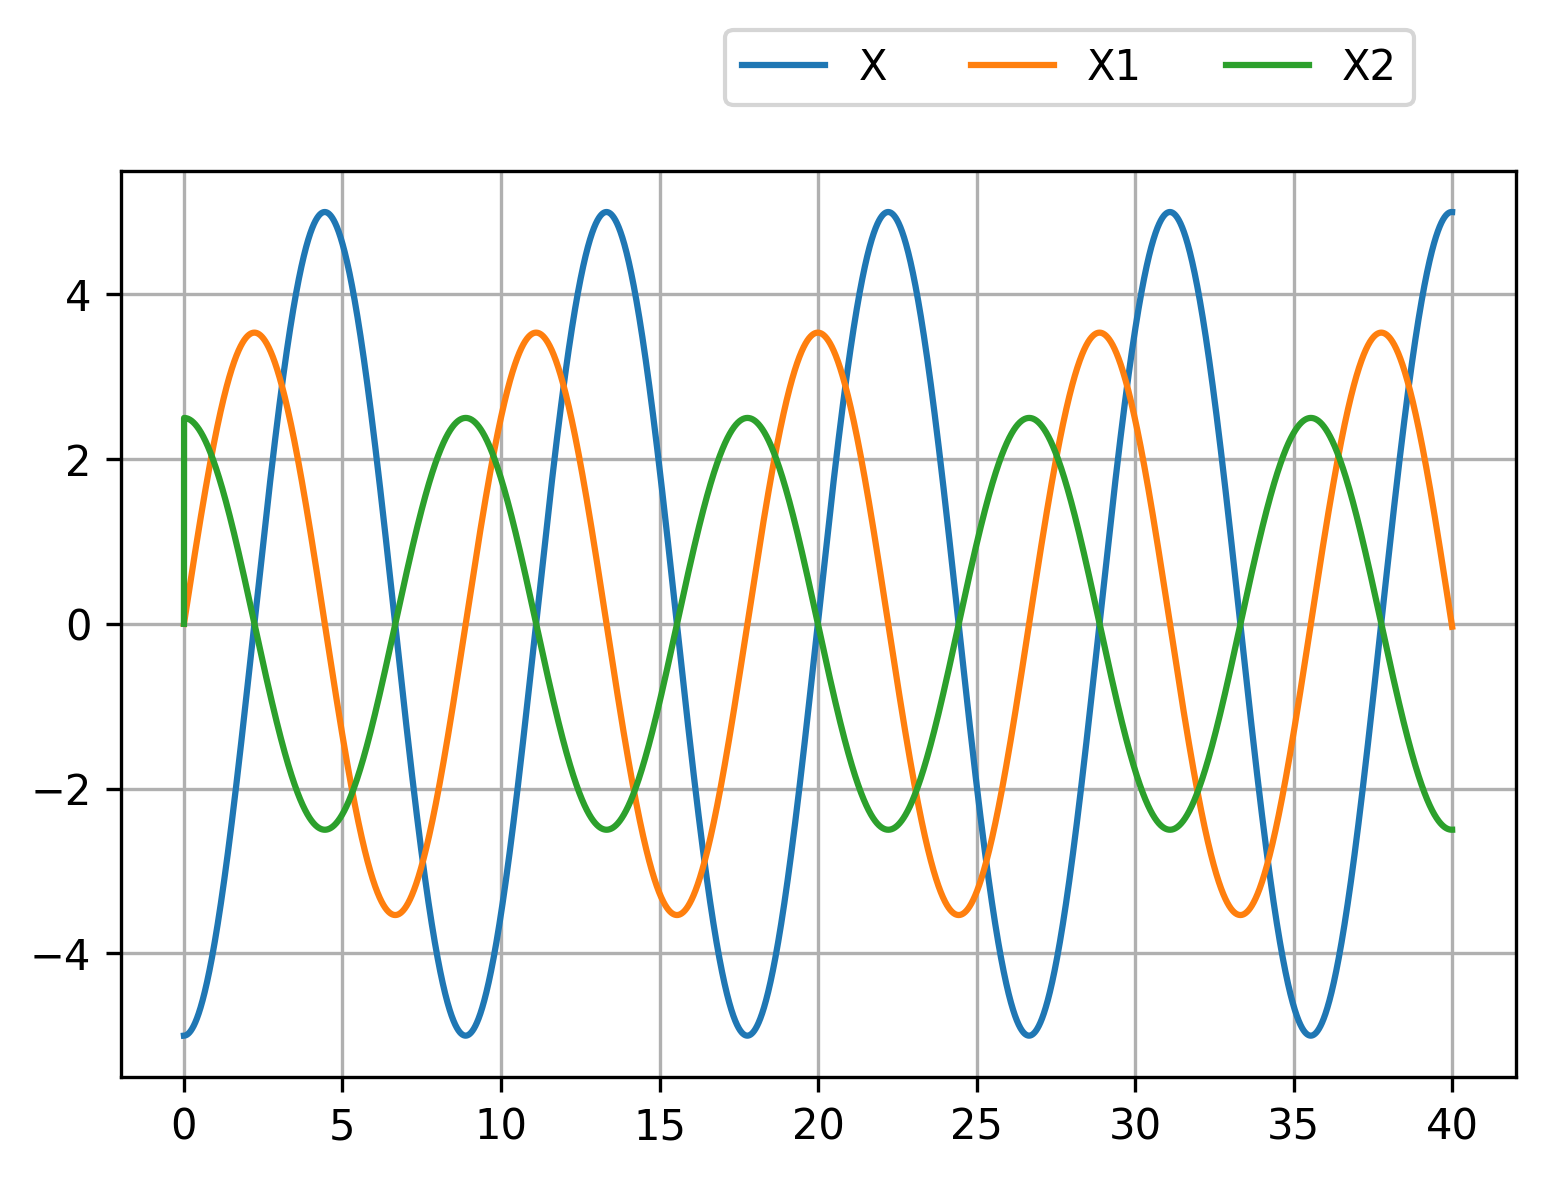

            t         X        X1        X2
0       0.000 -5.000000  0.000000  0.000000
1       0.004 -4.999960  0.010000  2.500000
2       0.008 -4.999880  0.020000  2.499980
3       0.012 -4.999760  0.030000  2.499940
4       0.016 -4.999600  0.039999  2.499880
5       0.020 -4.999400  0.049998  2.499800
6       0.024 -4.999160  0.059997  2.499700
7       0.028 -4.998880  0.069996  2.499580
8       0.032 -4.998560  0.079993  2.499440
9       0.036 -4.998200  0.089990  2.499280
10      0.040 -4.997800  0.099987  2.499100
11      0.044 -4.997360  0.109982  2.498900
12      0.048 -4.996880  0.119977  2.498680
13      0.052 -4.996360  0.129971  2.498440
14      0.056 -4.995801  0.139964  2.498180
15      0.060 -4.995201  0.149955  2.497900
16      0.064 -4.994561  0.159946  2.497600
17      0.068 -4.993881  0.169935  2.497280
18      0.072 -4.993162  0.179922  2.496941
19      0.076 -4.992402  0.189909  2.496581
20      0.080 -4.991602  0.199894  2.496201
21      0.084 -4.990763  0.20987

In [42]:
start_time = 0.
end_time = 40.
number_of_iteration = 10000
start_x = -5.
start_x1 = 0.
start_x2 = 0.
k = 0.1
m = 0.2
test = Lab21(start_time, end_time, number_of_iteration, start_x, start_x1, start_x2, k, m)
test.main()

## Колебание шарика на пружинке (с затуханиями)

In [43]:
class Lab21(object):
    def __init__(self, start_time, end_time, number_of_iteration, start_x, start_x1, start_x2, k, m, p):
        self._time = start_time
        self._step = (end_time-start_time)/number_of_iteration
        self._number_of_iteration = number_of_iteration
        self._m = m
        self._k = k
        self._answer = {"X": [], 
                "X1": [],
                "X2": [],
                "t": []}
        self._x = start_x
        self._x1 = start_x1
        self._x2 = start_x2
        self._p = p
        self._write_to_table()
    
    def _calculate_x2(self, x, x1):
        return -self._k*(x/m) - self._p*x1
    
    def _calculate_x1(self, x1, x2):
        return x1 + self._step * x2
    
    def _calculate_x(self, x, x1):
        return x + self._step * x1
    
    def _calculate_time(self, time):
        return time + self._step
    
    def _write_to_table(self):
        self._answer["X"].append(self._x)
        self._answer["X1"].append(self._x1)
        self._answer["X2"].append(self._x2)
        self._answer["t"].append(self._time)
    
    def calculate_values(self, x, x1, x2, time):
        self._x2 = self._calculate_x2(x, x1)
        self._x1 = self._calculate_x1(x1, self._x2)
        self._x = self._calculate_x(x, self._x1)
        self._time = self._calculate_time(time)
        
    def plot_results(self, t, x, x1, x2):
        plt.figure(dpi=300)
        plt.plot(t, x, label="X")
        plt.plot(t, x1, label="X1")
        plt.plot(t, x2, label="X2")
        plt.grid(True)
        plt.legend(loc="best", fontsize=13)
        leg = plt.legend(bbox_to_anchor=(0.855,1.015),\
                         bbox_transform=plt.gcf().transFigure, ncol=3)
        plt.show()
    
    def main(self):
        for i in range(self._number_of_iteration):
            self.calculate_values(self._x, self._x1, self._x2, self._time)
            self._write_to_table()
        answer_table = pd.DataFrame(self._answer, columns=['t', 'X', 'X1', 'X2'])
        self.plot_results(self._answer["t"], self._answer["X"], self._answer["X1"], self._answer["X2"])
        print(answer_table)

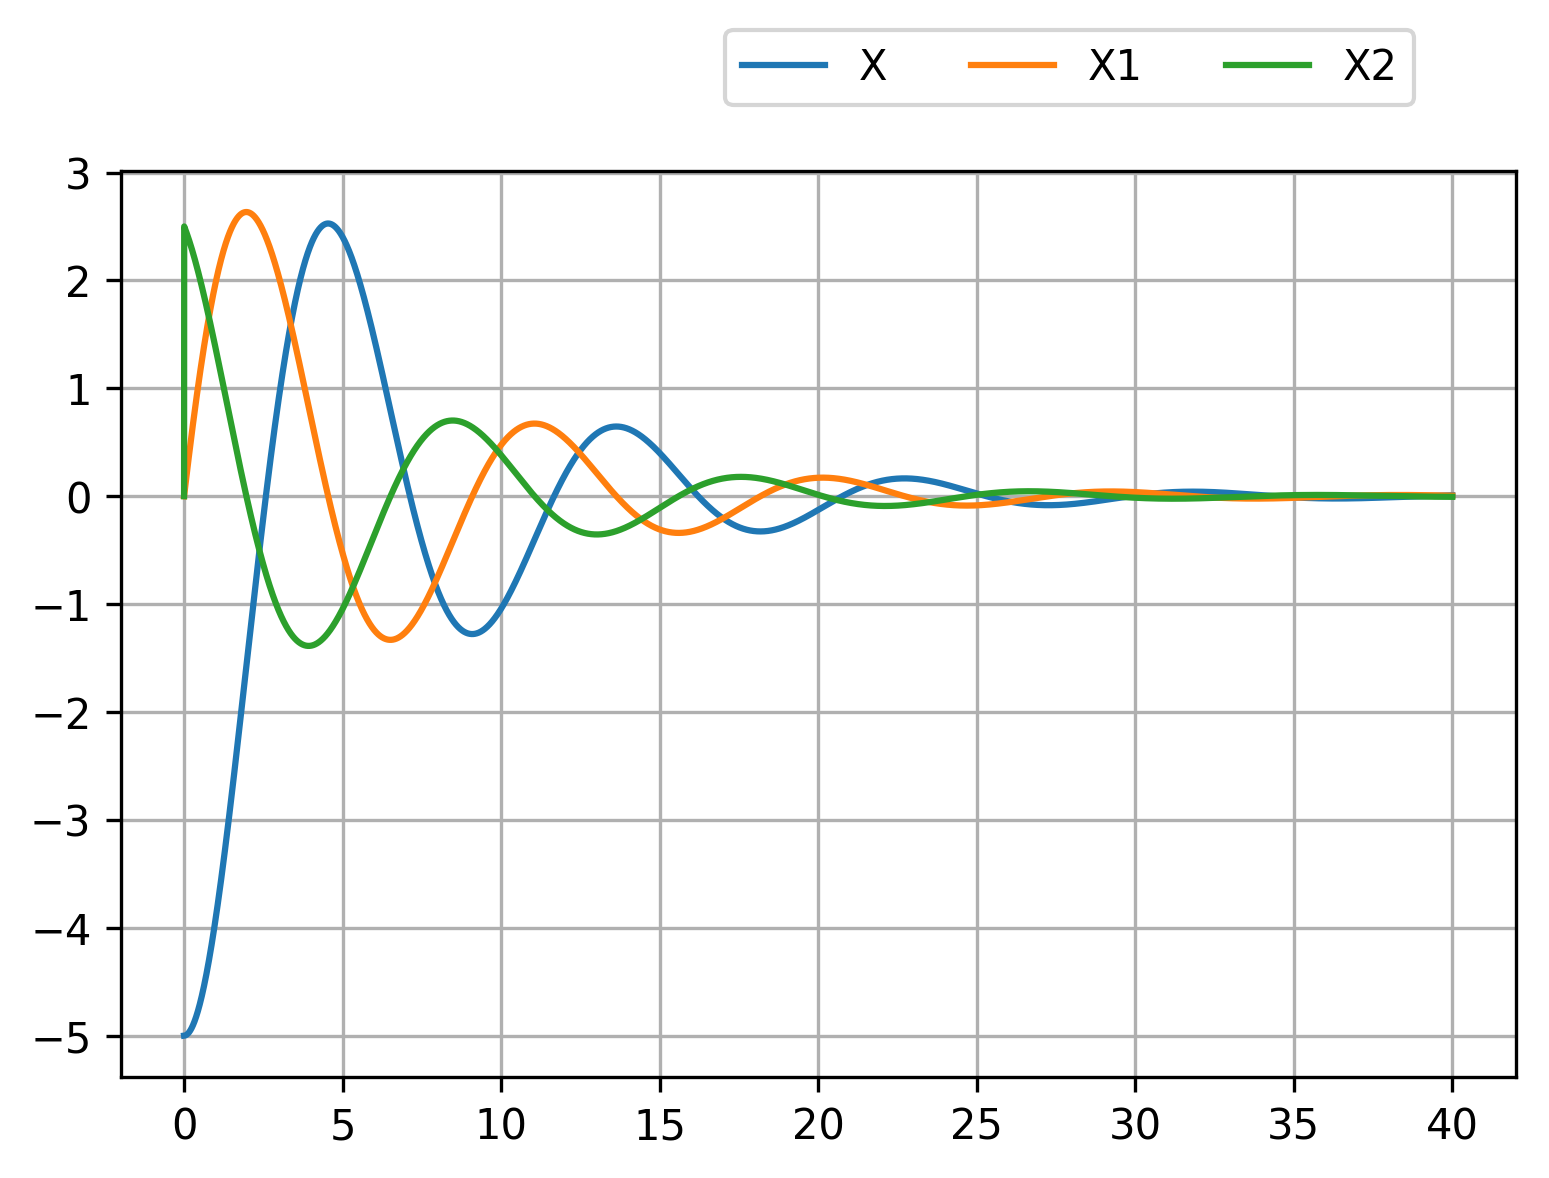

            t         X        X1        X2
0       0.000 -5.000000  0.000000  0.000000
1       0.004 -4.999960  0.010000  2.500000
2       0.008 -4.999880  0.019988  2.496980
3       0.012 -4.999760  0.029964  2.493944
4       0.016 -4.999600  0.039927  2.490891
5       0.020 -4.999401  0.049879  2.487822
6       0.024 -4.999162  0.059817  2.484737
7       0.028 -4.998883  0.069744  2.481636
8       0.032 -4.998564  0.079658  2.478518
9       0.036 -4.998206  0.089560  2.475385
10      0.040 -4.997808  0.099449  2.472235
11      0.044 -4.997371  0.109325  2.469069
12      0.048 -4.996894  0.119188  2.465888
13      0.052 -4.996378  0.129039  2.462690
14      0.056 -4.995822  0.138877  2.459477
15      0.060 -4.995228  0.148702  2.456248
16      0.064 -4.994593  0.158514  2.453003
17      0.068 -4.993920  0.168313  2.449743
18      0.072 -4.993208  0.178099  2.446466
19      0.076 -4.992456  0.187872  2.443174
20      0.080 -4.991666  0.197631  2.439867
21      0.084 -4.990836  0.20737

In [44]:
start_time = 0.
end_time = 40.
number_of_iteration = 10000
start_x = -5.
start_x1 = 0.
start_x2 = 0.
k = 0.1
m = 0.2
p = 0.3
test = Lab21(start_time, end_time, number_of_iteration, start_x, start_x1, start_x2, k, m, p)
test.main()